In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Integration


### **Topic 9** Definite Integral Graphed as the Area Under the Curve:  Choose a quadratic function and bounds.


References

3Blue1Brown, 2017.  Integration and the fundamental theorem of calculus | Chapter 8, Essence of calculus. Youtube. https://www.youtube.com/watch?v=rfG8ce4nNh0

$f_{,}(x)$

In this post I will discuss the following function:
$$
f(x) = 25-x^2
$$

We would like to know the area under the curve between -5 and 5, which can be expressed using the following integration:
$$
\int_{-5}^{5} [25-x^2]dx
$$

The fundamental theorem of calculus states that taking the derivative of the integral returns the original function.
$$
\frac{d}{dx}\left[ \int f(x) dx \right] = f(x)
$$

Therefore we can just use the graph of the original function and shade the area between our limits of integration to express the integral as the area under a curve.

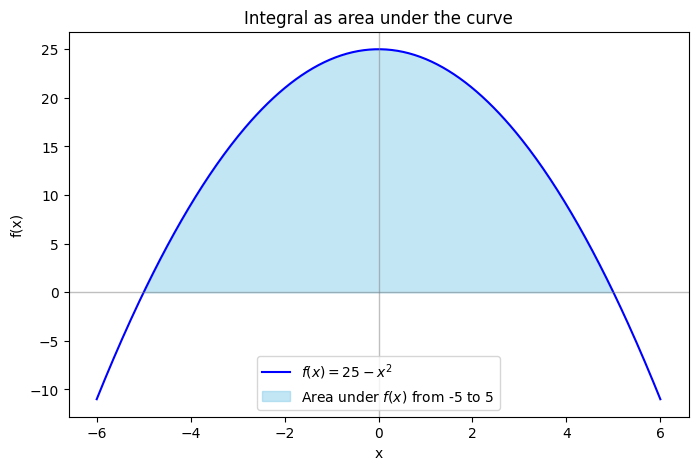

In [196]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
x = sp.symbols('x')
expr = -x**2+25
f = sp.lambdify(x, expr)

# Create x values
x = np.linspace(-6, 6, 400)
y = f(x)

# Define the interval of integration
a, b = -5, 5
x_fill = np.linspace(a, b, 400)
y_fill = f(x_fill)

# Plot the function
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r"$f(x) = 25 - x^2$", color="blue")
plt.fill_between(x_fill, y_fill, color="skyblue", alpha=0.5, label="Area under $f(x)$ from -5 to 5")
plt.axhline(0, color='gray', linewidth=1, alpha=0.5)
plt.axvline(0, color='gray', linewidth=1, alpha=0.5)
plt.title("Integral as area under the curve")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
# plt.grid(True)
plt.show()


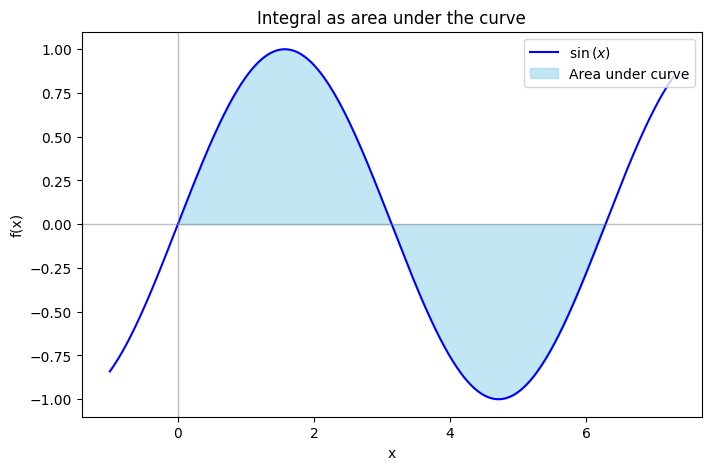

In [202]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
x = sp.symbols('x')
expr = sp.sin(x)
f = sp.lambdify(x, expr)
a, b = 0, 2*np.pi

# Create x values
x = np.linspace(a-1, b+1, 400)
y = f(x)

# Define the interval of integration
x_fill = np.linspace(a, b, 400)
y_fill = f(x_fill)

# Plot the function
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f"${sp.latex(expr)}$", color="blue")
plt.fill_between(x_fill, y_fill, color="skyblue", alpha=0.5, label=f"Area under curve")
plt.axhline(0, color='gray', linewidth=1, alpha=0.5)
plt.axvline(0, color='gray', linewidth=1, alpha=0.5)
plt.title("Integral as area under the curve")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
# plt.grid(True)
plt.show()

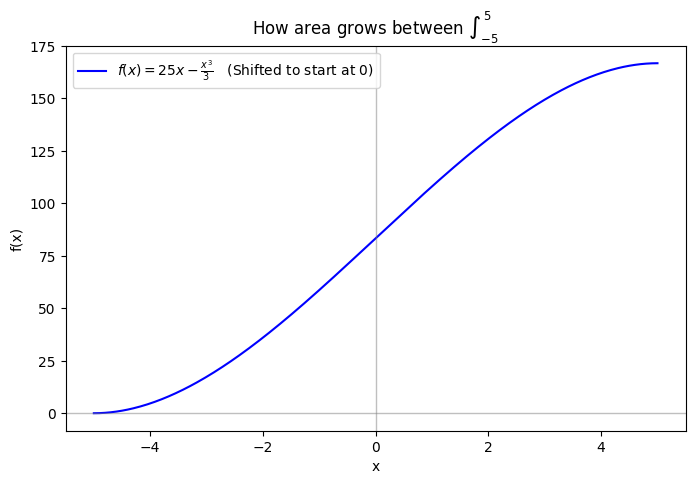

In [192]:
def f(x):
    return 25*x - x**3/3
x = np.linspace(-5, 5, 400)
y = f(x)
y = y - y[0]

plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r"$f(x) = 25x - \frac{x^3}{3}$   (Shifted to start at 0)", color="blue")
plt.axhline(0, color='gray', linewidth=1, alpha=0.5)
plt.axvline(0, color='gray', linewidth=1, alpha=0.5)
plt.title("How area grows between $\\int^{5}_{-5}$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
# plt.grid(True)
plt.show()

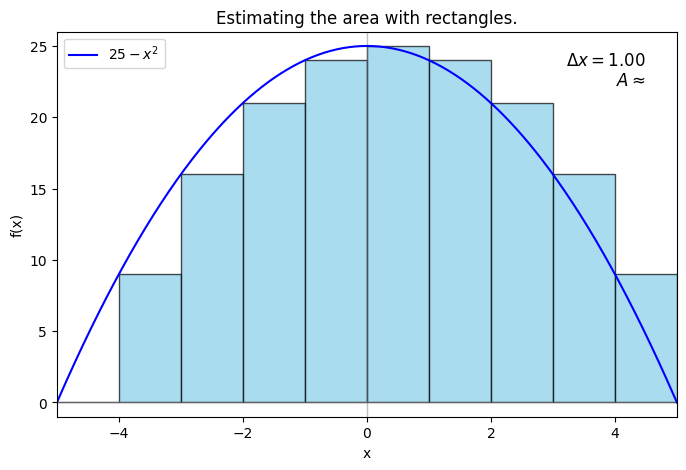

In [6]:
# Without Animation
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc

def latex_to_mathjax(latex_str):
    return f"${latex_str}$"

# Define our expression using sympy
x = sp.symbols('x')
expr = -x**2+25


a, b = -5,5
f = sp.lambdify(x, expr)
x_vals = np.linspace( a, b, 400)
y_vals = f(x_vals)

fig, ax = plt.subplots(figsize=(8, 5))
# ax.set_title(latex_to_mathjax(sp.latex(expr)))
ax.set_title("Estimating the area with rectangles.")
ax.axhline(0, color='gray', linewidth=1, alpha=0.5)
ax.axvline(0, color='gray', linewidth=1, alpha=0.5)
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.set_xlim(a, b)
ax.set_ylim(np.min(y_vals)-1, np.max(y_vals) + 1)


ax.plot(x_vals, y_vals, 'blue', label=latex_to_mathjax(sp.latex(expr)))

dx = 1
x_rects = np.arange(a, b, dx)
n_rects = x_rects.size
for rect in x_rects:
    ax.bar(rect, f(rect), 
           width=dx, align='edge', 
           color='skyblue', edgecolor='black', alpha=.7, 
        #    label=f"$dx ={dx}$"
           )
ax.text(0.95, 0.95, f"$\\Delta x = {dx:.2f}$\n$A \\approx $", 
        transform=ax.transAxes, 
        ha='right', va='top', 
        fontsize=12, color='black')

ax.legend()


plt.show()

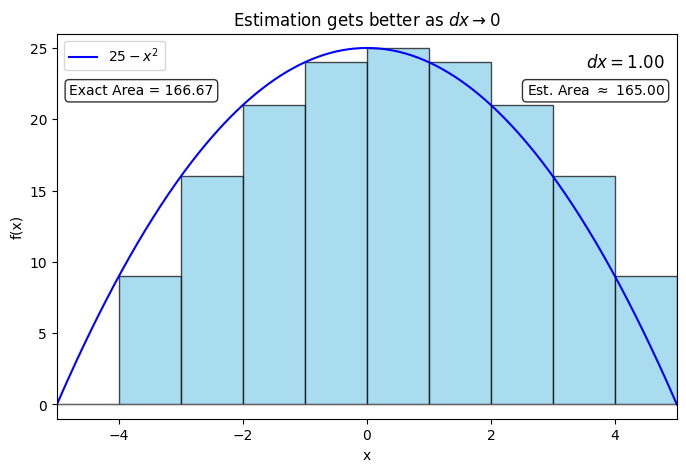

In [35]:
# With animation
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def latex_to_mathjax(latex_str):
    return f"${latex_str}$"

# Define our expression using sympy
x = sp.symbols('x')
expr = -x**2+25
a, b = -5,5

direct_area = expr.integrate((x, a, b))

# Set up Initial figure
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Estimation gets better as $dx \\to 0$")
ax.axhline(0, color='gray', linewidth=1, alpha=0.5)
# ax.axvline(0, color='gray', linewidth=1, alpha=0.5)
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.set_xlim(a, b)
ax.set_ylim(np.min(y_vals)-1, np.max(y_vals) + 1)

# Set up non-updateable artists
f = sp.lambdify(x, expr)
x_vals = np.linspace( a, b, 400)
y_vals = f(x_vals)
ax.plot(x_vals, y_vals, 'blue', label=latex_to_mathjax(sp.latex(expr)))
ax.legend(loc='upper left')
ax.text(    0.02, 0.87, 
            f"Exact Area = {float(direct_area):.2f}", 
            fontsize=10, color='black',
            transform=ax.transAxes, 
            ha='left', va='top',
            bbox=dict(  boxstyle="round", 
                        facecolor="white", 
                        edgecolor="black", 
                        alpha=0.8))


# Set up updatable artists
dx_label =  ax.text(0.98, 0.95, f"$dx = {dx:.2f}$", 
            transform=ax.transAxes, 
            ha='right', va='top', 
            fontsize=12, color='black')

a_label =   ax.text(0.98,0.87,
                    f"Est. Area = ",
                    fontsize=10, color='black',
                    transform=ax.transAxes, 
                    ha='right', va='top',
                    bbox=dict(  boxstyle="round", 
                                facecolor="white", 
                                edgecolor="black", 
                                alpha=0.8)
                    )
bars = []

# Set up per-frame function
def update(dx):
    # Clear any existing bars drawn
    global bars
    for bar in bars:
        bar.remove()

    # Draw the bars
    bars = []
    vals = []
    x_rects = np.arange(a, b, dx)
    for rect in x_rects:
        val = f(rect)
        vals.append(val)
        bar =   ax.bar(rect, val, 
                width=dx, align='edge', 
                color='skyblue', edgecolor='black', alpha=.7, 
                )
        # Store each bar for later removal
        bars.extend(bar)
    
    # get est. area
    est_area = sum(vals)*dx

    # Update text
    dx_label.set_text(f"$dx = {dx:.2f}$")
    a_label.set_text(f"Est. Area $\\approx$ {est_area:.2f}")


## Smooth the animation, courtesy of ChatGPT
dx_start = 1
dx_end = 0.05
num_frames = 40
# t ranges from 0 to 1
t = np.linspace(0, 1, num_frames)
# Smoothstep easing: starts slow, speeds up, slows down
ease = 3*t**2 - 2*t**3
# Map easing to dx values
dx_vals = dx_start - (dx_start - dx_end) * ease
# Linger at the start and end
dx_vals = np.concatenate([np.full(5, dx_start), dx_vals, np.full(15, dx_end)])

# Create the animation object
anim = FuncAnimation(fig, update, 
                     frames=dx_vals,
                     interval = 100
                     )

In [37]:
anim.save('aoc_dx_to_zero.gif')

In [36]:
HTML(anim.to_html5_video())

------

## Topic 1 Definite Integral of a Polynomial


## Topic 2 Indefinite Integral of a Polynomial



## Topic 3 Definite Integral of a Negative Exponent



## Topic 4 Indefinite Integral of a Negative Exponent



## Topic 5 Definite Integral of a Root (or Fractional Exponent)



## Topic 6 Indefinite Integral of a Root (or Fractional Exponent)



## Topic 7 Finding Specific Antiderivatives (ie. Solving for C) with an Exponential Function



## Topic 8 Finding Specific Antiderivatives (ie. Solving for C) with a Rational Function



## Topic 10 Definite Integral Graphed as the Area Under the Curve:  Choose a linear function and bounds.



## Topic 11 Word Problem Requiring Finding the Area Under a Curve.



## Topic 12 Simpson's Rule



## Topic 13 Trapezoidal Rule



## Topic 14 Midpoint Rule



## Topic 15 Integral of a Logarithm or Natural Logarithm



## Topic 16 Integral of Sine, Cosine, and Tangent Functions (3 Examples: Make them your own with coefficients and constants.)


| Trig IDs          | | |
|--|--|--|
| | $\sin x$            | $\cos x$                                  |
| | $\cos x$            | $-\sin x$                                 |
| | $\tan x$            | $\sec^2 x$                                |
| | $\cot x$            | $-\csc^2 x$                               |
| | $\sec x$            | $\sec x \tan x$                           |
| | $\csc x$            | $-\csc x \cot x$                          |


## Topic 17 Integral of Equation Involving $\sec^2 (x)$


$$
\frac{d}{dx}[\tan(x)] = \sec^2(x) \iff \int [\sec^2(x) dx] = \tan(x)
$$


## Topic 18 Integral of Equation Involving $\sec(x)\tan(x)$



## Topic 19 Integral of Equation Involving $-\csc^2 (x)$



## Topic 20 Integral of Equation Involving $\csc(x)\cot(x)$